<a href="https://colab.research.google.com/github/Tejitha36/FMML_Project_and_Labs/blob/main/AIML_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [26]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [3, 4],
    [-3, 1],
    [1, 3],
    [2, 6],
    [4, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [3, 4,-1],
    [-3, 1,-1],
    [1, 3,-1],
    [2, 6,-1],
    [4, 2,-1]
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

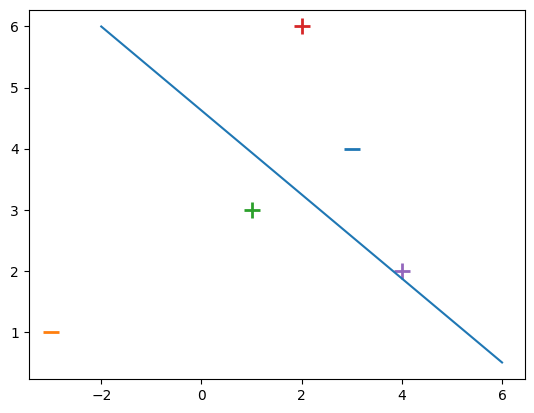

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

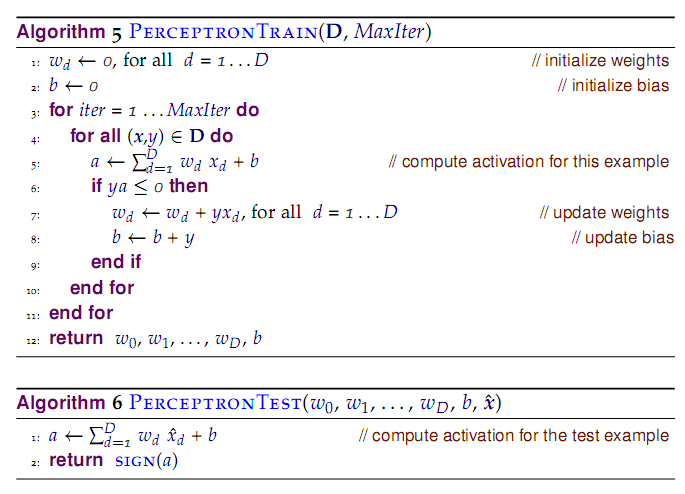

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [49]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

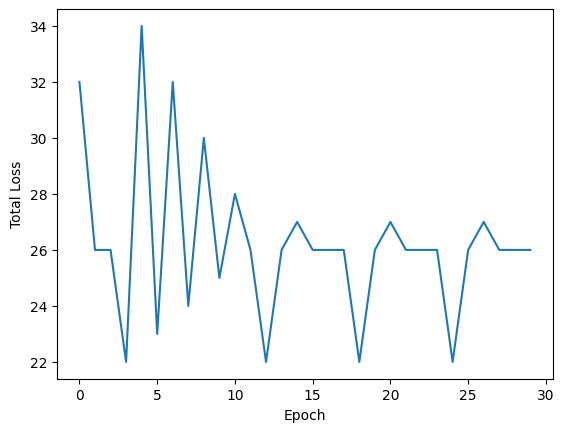

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

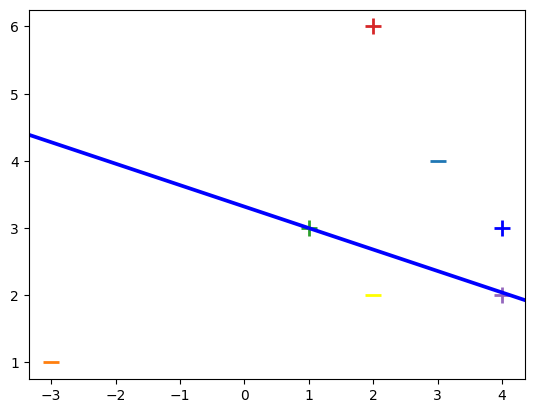

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.


In [22]:
import pandas as pd
from google.colab import files
uploaded = files.upload()



Saving sonar.csv to sonar.csv


In [44]:

# Load the sonar dataset
df = pd.read_csv("sonar.csv", header=None)

# Split features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

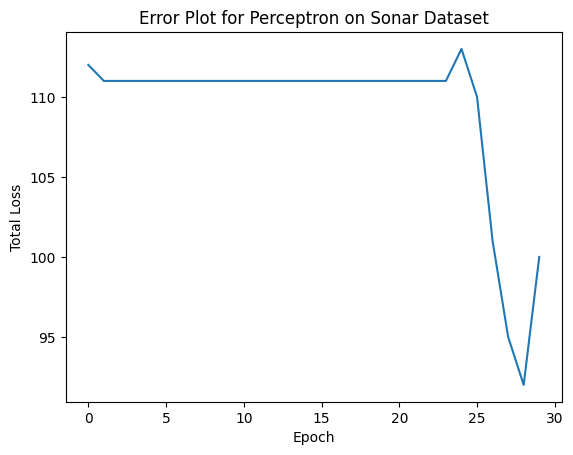

In [47]:
# Training the perceptron algorithm and plotting error
w = perceptron_algo_plot(X, y)


2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?




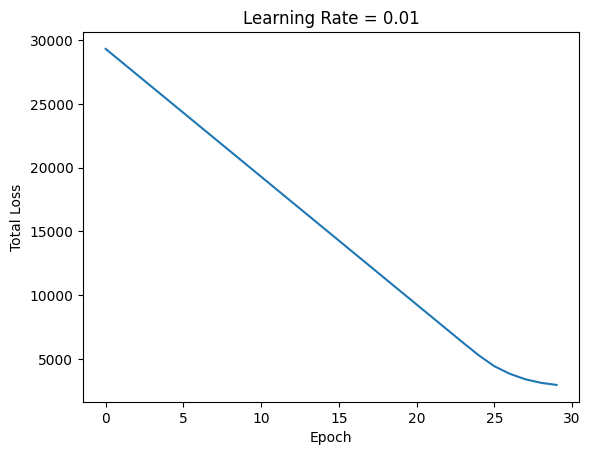

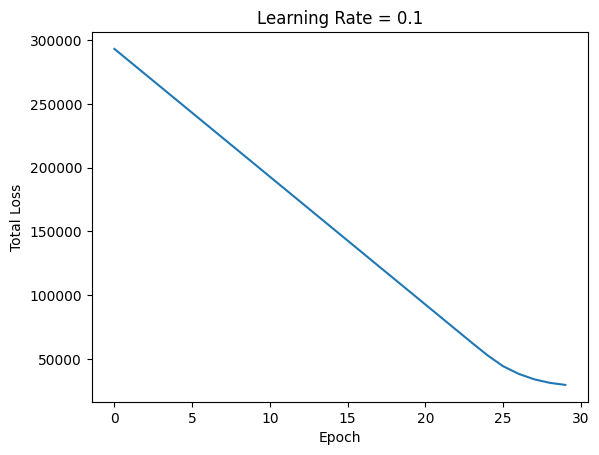

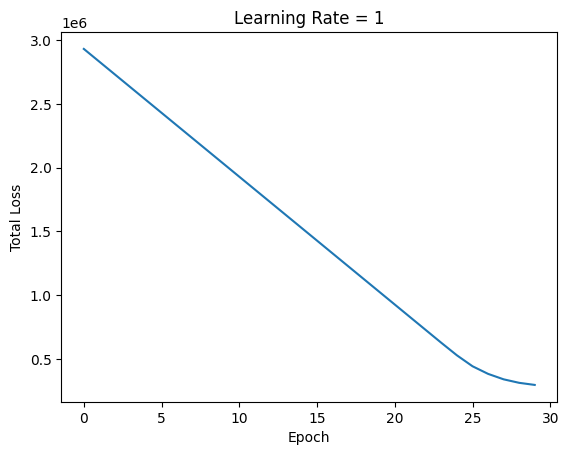

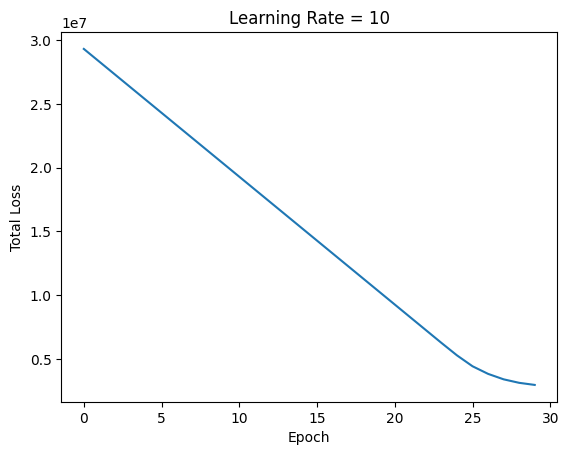

In [54]:
def perceptron_algo_plot_with_lr(X, Y, eta):
    '''
    train perceptron with a specified learning rate and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :param eta: learning rate
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title(f'Learning Rate = {eta}')
    plt.show()

    return w

# Try different learning rates
etas = [0.01, 0.1, 1, 10]
for eta in etas:
    w = perceptron_algo_plot_with_lr(X, y, eta)


**Observations**:

Small Learning Rate: A small learning rate will lead to slow convergence, but it is more stable.

Large Learning Rate: A very large learning rate can cause the weights to oscillate and fail to converge properly. It may diverge, meaning the perceptron will never find a stable decision boundary.

3.Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.

In [57]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

In [13]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [14]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


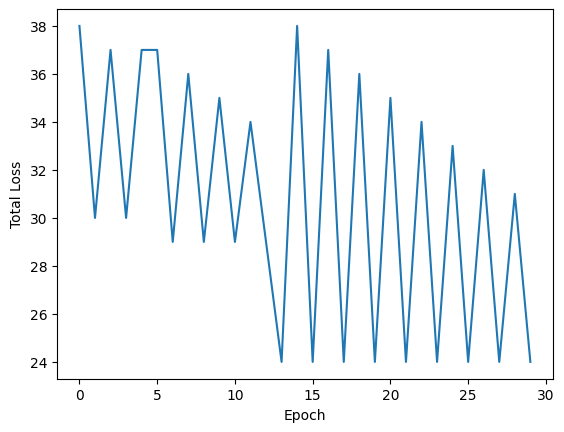

In [15]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

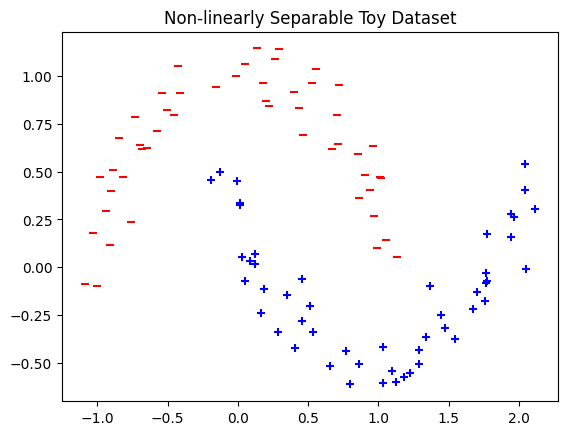

In [55]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.1)
y = np.where(y == 0, -1, 1)

# Visualize the dataset
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='_')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='+')
plt.title('Non-linearly Separable Toy Dataset')
plt.show()


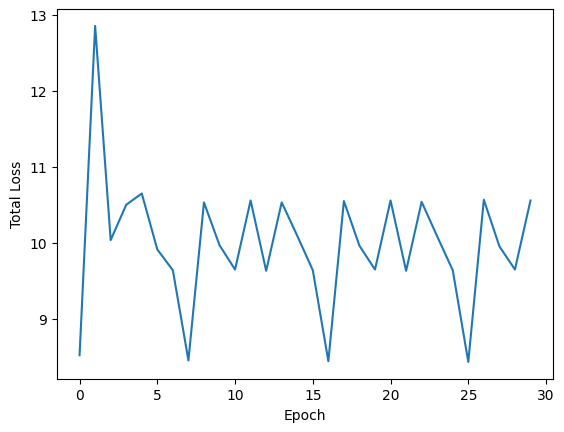

In [59]:
# Apply the perceptron algorithm
w = perceptron_algo_plot(X, y)

# Observe the behavior - likely, the perceptron will not converge as the data is not linearly separable


## **Additional Critical Thinking Questions**


1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.

  A)
  (i)Dataset (AND function over 2-bit binary input):

x1  |x2	| y (AND(x1, x2))

0      | 	0	|         -

0 | 	1 |  	-

1 |	0 |	-

1 |	1 |	+


In the 2D plane (with x1 and x2 as axes), the data points (0,0), (0,1), and (1,0) belong to the negative class (-), and the point (1,1) belongs to the positive class (+). A perceptron can draw a linear boundary that separates the positive class from the negative class.

Thus, this function is linearly separable, and a perceptron can successfully learn the AND function.

ii) Weights Update Procedure for Each Iteration
Initialization:
Weights (w): [0, 0]

Bias (b): 0

Learning Rate (η): 1

Iterations (update rule: w = w + η * x * y, b = b + η * y):
Iteration 1:

𝑥
=
(
0
,
0
)
,
𝑦
=
−
1

Prediction:
0
×
0
+
0
×
0
+
0
=
0

Update:
𝑤
=
[
0
,
0
]
+
1
×
[
0
,
0
]
×
−
1
=
[
0
,
0
]
,
𝑏
=
0
+
1
×
−
1
=
−
1

Iteration 2:

𝑥
=
(
0
,
1
)
,
𝑦
=
−
1

Prediction:
0
×
0
+
0
×
1
−
1
=
−
1

No update required as the prediction matches the label.

Iteration 3:

𝑥
=
(
1
,
0
)
,
𝑦
=
−
1

Prediction:
0
×
1
+
0
×
0
−
1
=
−
1

No update required as the prediction matches the label.

Iteration 4:

𝑥
=
(
1
,
1
)
,
𝑦
=
1

Prediction:
0
×
1
+
0
×
1
−
1
=
−
1

Update:
𝑤
=
[
0
,
0
]
+
1
×
[
1
,
1
]
×
1
=
[
1
,
1
]
,

After several iterations through all samples, weights will converge to values that correctly classify all inputs.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

  A)
  There are 16 possible boolean functions for two binary inputs (x1, x2). Each boolean function has a truth table with 4 inputs and outputs, and there are
2
4
=
16
2
4
 =16 distinct possible boolean functions.


16 Boolean Functions for 2-Bit Inputs:
Each input combination (x1, x2) can either produce a 0 or 1, so there are 16 different combinations of truth values for all four inputs. These combinations can represent the 16 distinct boolean functions.
Learnable Boolean Functions:
The perceptron can only learn functions that are linearly separable. These are the boolean functions where the points in the input space can be separated by a straight line.

For a perceptron, the boolean functions that are linearly separable include:

AND (0001)

OR (0111)

NAND (1110)

NOR (1000)

XOR (0110)

XNOR (1001)

Non-learnable Boolean Functions:

The non-learnable boolean functions are the ones that are not linearly separable. These include:


IMPLICATION (1001)

BICONDITIONAL (1101)

Truth Tables for Non-Learnable Functions:

BICONDITIONAL (x1 ↔ x2):

x1	x2	y

0	0	1

0	1	0

1	0	0

1	1	1


IMPLICATION (x1 → x2):

x1	x2	y

0	0	1


0	1	1

1	0	0

1	1	1

These functions cannot be separated by a straight line, which is why a perceptron cannot learn them.



